### Holt's Exponential Smoothing technique

- Simple exponential smoothing technique captures level of a time series. In this tutoral we will learn about Holt's exponential smoothing technique which captures both level and trend of a time series in the forecast.
- Holt (1957) extended simple exponential smoothing to allow the forecasting of data with a trend. This method involves a forecast equation and two smoothing equations (one for the level and one for the trend)
    

**Forecast Equation**: <br>
    $\hat{y}_{t+1} = l_t + b_t$
<br>
$l_t$ is level component<br>
$b_t$ is trend component

**Trend Equation**: <br>
    ${b}_{t} = \beta*(l_t - l_{t-1}) + (1 - \beta)* b_{t-1}$
<br>
where β is the smoothing parameter for trend<br>

The difference in the level components in the recent observation shows the trend of the recent value, 
which is assigned a weight of β, whereas the trend values of the previous observations are assigned a weight of 
(1−β)
 .

**Equation of level component**<br>
$l_t = \alpha*y_t + (1-\alpha)*(l_{t-1} + b_{t-1})$

  
- $ℓ_t$ : denotes an estimate of the level of the series at time t
- $b_t$ : denotes an estimate of the trend (slope) of the series at time t
- α : is the smoothing parameter for the level, where 0 ≤ α ≤ 1
- β : is the smoothing parameter for the trend,  where 0 ≤ β ≤ 1
 .

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

         Actual_Sales
Quarter              
Q1-17              80
Q2-17             130
Q3-17             140
Q4-17              90
Q1-18             112
Q2-18             182
Q3-18             196
Q4-18             126
Q1-19             157
Q2-19             255
Q3-19             274
Q4-19             176
         Actual_Sales       level      trend    forecast
Quarter                                                 
Q1-17              80   80.000000        NaN         NaN
Q2-17             130   90.000000   2.000000         NaN
Q3-17             140  101.600000   3.920000   92.000000
Q4-17              90  102.416000   3.299200  105.520000
Q1-18             112  106.972160   3.550592  105.715200
Q2-18             182  124.818202   6.409682  110.522752
Q3-18             196  144.182307   9.000567  131.227884
Q4-18             126  147.746299   7.913252  153.182873
Q1-19             157  155.927640   7.966870  155.659550
Q2-19             255  182.115608  11.611089  163.894510
Q3-19   

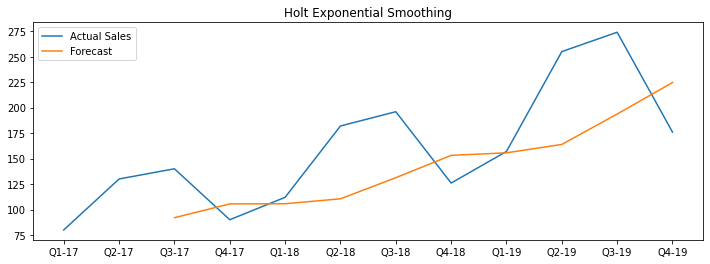

In [64]:
# sales data

Quarters = ['Q'+str(q)+'-'+str(yr)  for yr in [17,18,19] for q in range(1,5)]
Actual = [80, 130, 140, 90, 112, 182, 196, 126, 157, 255, 274, 176]

d = {'Quarter': Quarters, 'Actual_Sales':Actual}
data = pd.DataFrame(d)
data.set_index('Quarter', inplace=True)
print(data)

alpha=0.2
beta=0.2

y_hat_hes = data.copy()

y_hat_hes['level'] =0
y_hat_hes['trend'] = 0
y_hat_hes['forecast'] = 0


for i in range(len(y_hat_hes)):
    # initialize 
    if i==0:
        y_hat_hes.iloc[i, 1] = y_hat_hes.iloc[i, 0] # set level as yt for first row
        continue
    
    yt = y_hat_hes.iloc[i, 0]
    ltminus1 = y_hat_hes.iloc[i-1, 1]
    btminus1 = y_hat_hes.iloc[i-1, 2]
    lt = alpha * yt + (1-alpha) * (ltminus1 + btminus1)

    bt = beta * (lt - ltminus1) + (1-beta) *(btminus1)

    y_hat_hes.iloc[i, 1] = lt
    y_hat_hes.iloc[i, 2] = bt
    forecast = lt + bt
    if i < len(y_hat_hes)-1:
        y_hat_hes.iloc[i+1, 3] = forecast
        
y_hat_hes.iloc[0, 2] = np.nan # trend for first rec is null
y_hat_hes.iloc[0:2, 3] = np.nan  # forecast for first two rec is null
print(y_hat_hes)

plt.figure(figsize=(12,4))

plt.plot(y_hat_hes.index, y_hat_hes.iloc[:, 0], label='Actual Sales')
plt.plot(y_hat_hes.index, y_hat_hes.iloc[:, 3], label='Forecast')

plt.legend()
plt.title('Holt Exponential Smoothing')
plt.show()

### Holt's Simple Smoothing Exponential method including trend

In [33]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [34]:
#read data from file
df = pd.read_csv(r'./data/airline-traffic.csv', header=None)

#rename column headers
df.columns  =['Month', 'Passengers']

# make month column as datetime
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')

# Change month column as index
df.set_index('Month', inplace=True)

# impute missing values by linear interpolate 
df.Passengers.interpolate(method='linear', inplace=True)

# change datatype of passengers as int
df['Passengers'] = df['Passengers'].astype('int')

### Split data into train , test
train =  df[0:120]
test  =  df[120:]

In [40]:
model = ExponentialSmoothing(np.asarray(train['Passengers']), seasonal_periods=12, \
                             trend = 'additive', seasonal=None)


In [44]:
model_fit = model.fit(smoothing_level = 0.3, smoothing_slope = 0.01, optimized=False)
print(model_fit.params)

y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.3, 'smoothing_slope': 0.01, 'smoothing_seasonal': None, 'damping_slope': nan, 'initial_level': 112.0, 'initial_slope': 6.0, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [45]:
y_hat_holt.head()

,Passengers,holt_forecast
Month,,
1959-01-01,360,377.936065
1959-02-01,342,381.191530
1959-03-01,406,384.446996
1959-04-01,396,387.702461
1959-05-01,420,390.957927


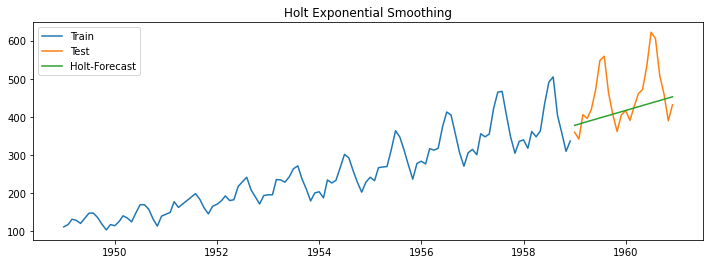

In [48]:
plt.figure(figsize=(12,4))

plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt-Forecast')

plt.legend()
plt.title('Holt Exponential Smoothing')
plt.show()

In [53]:

# error
error = y_hat_holt.iloc[:, 0] - y_hat_holt.iloc[:, 1]

rmse = np.sqrt((np.sum(error**2))/len(error))
mape = (np.sum(abs(error) / y_hat_holt.iloc[:,0])) * 100 / len(error)

print(f"RMSE: {rmse}, MAPE:{mape}")

RMSE: 78.39245949688907, MAPE:11.170470973074538
